# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

### 0.0 Import all required modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm 
import seaborn as sns

import os

In [2]:
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [3]:
# First view all files included in folder
data_dir = 'data/'
_files = os.listdir(data_dir)

print(_files)

['datapoints.csv', 'datatypes.csv', 'nodes.csv', 'sensors.csv', 'volcanos.csv']


In [4]:
# Import csv files save dataframe with file_name
datatypes=pd.read_csv(data_dir+_files[1])
datatypes.head(2)

,id,type,si_unit,type_id
0,35dcb3c0-8679-11e6-bda3-ef77801087ee,temperature,celcius,TCA
1,35dcb3c1-8679-11e6-bda3-ef77801087ee,pressure,pascal,PA


In [5]:
# Import csv files save dataframe with file_name, convert time to datetime
datapoints=pd.read_csv(data_dir+_files[0],parse_dates=['timestamp'])
datapoints.head(2)

,id,value,timestamp,sensor_id
0,764c5e60-8679-11e6-a353-2f6c041e2491,98.000,2016-08-03 04:39:25,7635c920-8679-11e6-a353-2f6c041e2491
1,764c5e61-8679-11e6-a353-2f6c041e2491,33.198,2016-08-03 04:39:25,763b9580-8679-11e6-a353-2f6c041e2491


In [6]:
# Import csv files save dataframe with file_name, convert time to datetime
nodes=pd.read_csv(data_dir+_files[2],parse_dates=['created_at','updated_at'])
nodes.head(2)

,id,name,description,location,status,created_at,updated_at,volcano_id
0,c5e39fa0-867a-11e6-a353-2f6c041e2491,N1,\N,\N,OFFLINE,2016-08-17 01:06:49,2016-09-29 19:28:05.932,35dc3e90-8679-11e6-bda3-ef77801087ee
1,c147ece0-8679-11e6-a353-2f6c041e2491,N9,\N,\N,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.065,35dc3e90-8679-11e6-bda3-ef77801087ee


In [7]:
# Import csv files save dataframe with file_name, convert time to datetime
sensors=pd.read_csv(data_dir+_files[3],parse_dates=['created_at','updated_at'])
sensors.head(2)

,id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491
1,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491


In [8]:
# Import csv files save dataframe with file_name, convert time to datetime
volcanos=pd.read_csv(data_dir+_files[4],parse_dates=['created_at','updated_at'])
volcanos.head()

,id,name,description,location,status,created_at,updated_at
0,35dc3e90-8679-11e6-bda3-ef77801087ee,Masaya,"This is the world's biggest, baddest, most evi...","{11.985318299999999,-86.178342900000004}",OFFLINE,2016-09-29 19:16:23.419,2016-10-07 07:43:05.015


### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Show each one in a separate subplot.


**STEP 0: Prepare Data for plotting**

In [9]:
# Create a copy of dataframe and set index to timestamp
datapoints_copy=datapoints.copy()
datapoints_copy.set_index("timestamp", inplace=True)

In [10]:
print("Time of first sensor reading:\t",datapoints_copy.index.min())
print("Time of last sensor reding:\t",datapoints_copy.index.max())

Time of first sensor reading:	 2016-07-01 00:00:31
Time of last sensor reding:	 2016-10-06 07:32:51


In [11]:
# Create list from the minimum time to maximum time to define tick marks of plot
xticks=pd.date_range(datapoints_copy.index.min(),datapoints_copy.index.max(),freq='2D')

**STEP 1: Plot sensor values in separate graph and save**

<font color='red'>**NB: Plots sensor values in seprate graphs and saves as image. No longer required for assignment**</font>

In [12]:
for sensor in datapoints_copy.sensor_id.unique():
    
    # Individual sensor table, this will be the data used to plot
    s=datapoints_copy[datapoints_copy.sensor_id==sensor]      
    
    # Used to make plot fancy add nodes, type of sensor to plot
    t=sensors[sensors.id==sensor].data_type_id.values             # SensorType
    n=sensors[sensors.id==sensor].node_id.values                  # SensorNode
    sensor_type=datatypes[datatypes.id==t[0]].type_id.values
    sensor_unit=datatypes[datatypes.id==t[0]].si_unit.values
    sensor_node=nodes[nodes.id==n[0]].name.values

    # Plotting of figures
    ax =s["value"].plot(color='blue', figsize=(20, 8), linewidth=2, fontsize=12)
    ax.set_title(sensor_node[0]+"-"+sensor,fontsize=14)
    ax.set_ylabel(sensor_type[0]+"("+sensor_unit[0]+")",fontsize=14)
    ax.set_xlabel("DATE",fontsize=14)
    ax.set_xlim(datapoints_copy.index.min(),datapoints_copy.index.max())
    ax.set_xticks(xticks)
    plt.xticks(rotation='vertical')
    
    #Saving figures
    plt.savefig("saved_plots/"+sensor_node[0]+"-"+sensor+"("+sensor_type[0]+")"+'.png')
    plt.clf()
    plt.close()

**STEP2: Plots sensor values for each sensor in the dataset on a separate subplot**

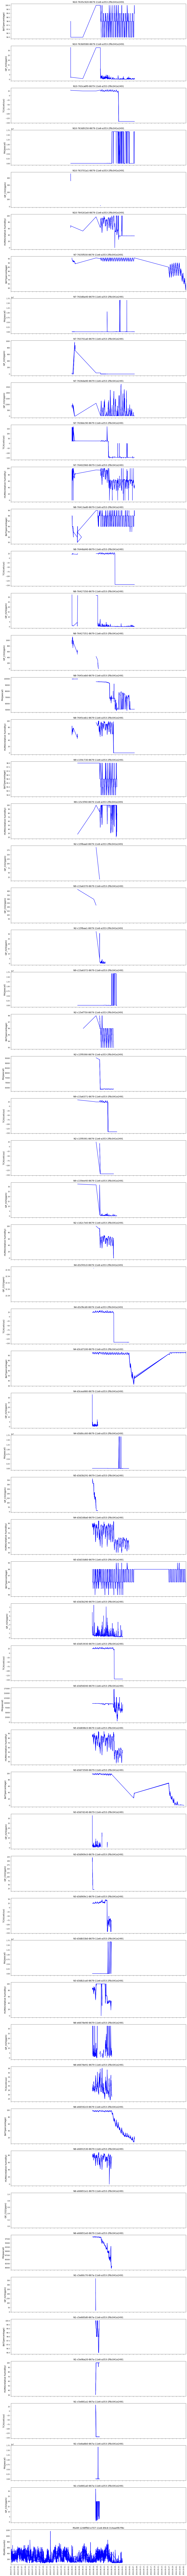

<Figure size 1440x1440 with 0 Axes>

In [13]:
# Set subplot settings
fig, axarr = plt.subplots(61, sharex=True,squeeze=True)
fig.set_size_inches(20,300) 
plt.xticks(rotation='vertical')


plt.figure(figsize=(20,20))    
for i,sensor in enumerate(datapoints_copy.sensor_id.unique()):
    
    # Individual sensor table, this will be the data used to plot
    s=datapoints_copy[datapoints_copy.sensor_id==sensor]
    
    # Used to make plot fancy add nodes, type of sensor to plot
    t=sensors[sensors.id==sensor].data_type_id.values        # SensorType
    n=sensors[sensors.id==sensor].node_id.values             # SensorNode
    sensor_type=datatypes[datatypes.id==t[0]].type_id.values
    sensor_unit=datatypes[datatypes.id==t[0]].si_unit.values
    sensor_node=nodes[nodes.id==n[0]].name.values
    
    # Plotting of figures
    # Plot named as Node-SensorID
    axarr[i].plot(s.index, s['value'],color='blue',linewidth=2,label=sensor)
    axarr[i].set_title(sensor_node[0]+"-"+sensor,fontsize=14,position=(0.5,1))
    axarr[i].set_ylabel(sensor_type[0]+"("+sensor_unit[0]+")",fontsize=14)
    axarr[i].format_xdata=mdates.DateFormatter('%Y-%m-%d')
    axarr[i].set_xlim(datapoints_copy.index.min(),datapoints_copy.index.max())
    axarr[i].set_xticks(xticks)
    
    #Saving figures
plt.savefig("images/"+"all_sensors"+'.png')


**What (if anything) can we tell about the various sensors from the plots?**

<font color='blue'>
     <p>1. Sensors have different range of values. </p>
     <p>2. Similar sensor types tend to fall within same range of values</p>
     <p>3. Sensor reading span for 3-months `2016-07-01` to `2016-10-05`</p>
     <p>4. Some sensors of same type seems to be highly correlated as they have similar pattern</p>
     <p>5. All sensors went offline at one point or the other. No sensor has complete set of readings</p>
     <p>6. Owing to (5) some sensors were active for only a few hours some days and a few for over a month</p>
     <p>7. One sensor(e66851e1-8679-11e6-a353-2f6c041e2491) in node 6  does not seem to have any values </p>
     <p>8. No general trend or seasonality can be deduced from the data. Hence further analysis will be required</p>
</font>

### 3.0 Descriptive Analysis One data frame at a time



You have two data frames: `sensors` and `types` Merge each sensor_id with its type. (Hint: Use `pd.merge()`)



In [14]:
# full = pd.merge(df1, df2, left_on='df1_field', right_on='df2_field')
sensor_type=pd.merge(sensors, datatypes, left_on='data_type_id', right_on='id').drop("id_y",axis=1)
sensor_type.head(2)

,id_x,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,c15a6370-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-07 00:51:40,2016-09-29 19:41:07.066,35dcdad0-8679-11e6-bda3-ef77801087ee,c147ece0-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2
1,7636da90-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 21:50:32,2016-09-30 18:12:04.577,35dcdad0-8679-11e6-bda3-ef77801087ee,762c5340-8679-11e6-a353-2f6c041e2491,carbon dioxide concentration,ppm,GP_CO2


3.1 Question: What does this achieve? Why should we do this?

<font color='blue'>
    <p>Merging the dataframes gave visibility of all the sensor parameters(thus creating a digital thread) in a single table.
    </p> 
   <p> This reduces the hassle of reading from several dataframes  just to identify and obtain  a single sensor parameter. This saves computing time and memory. This allows for ease in analysis and also in anomaly detection
    </p>
</font>

3.2: How many sensors of each type are there?

In [15]:
i=0
dict={'Sensor Type':[],'Number':[]}
for sensor_types in sensors.data_type_id.value_counts().index:
    dict['Sensor Type'].append(datatypes[datatypes.id==sensor_types].type.values[0])
    dict['Number'].append(sensors.data_type_id.value_counts()[i])
    i+=1
pd.DataFrame.from_dict(dict)

,Sensor Type,Number
0,hydrogen sulfide concentration,10
1,temperature,10
2,carbon dioxide concentration,10
3,battery,10
4,humidity,10
5,pressure,10
6,RSAM,1


<font color='blue'> The 61 sensors installed used for the measurement fall into 6 different types. All sensor type except `RSAM` have 10 installed. `RSAM` has only 1 installed.</font>

----
### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

-----

In [16]:
full = pd.merge(datapoints, sensor_type, left_on='sensor_id', right_on='id_x').drop('id_x',axis=1)
full.set_index('timestamp',inplace=True)
full.head(2)

,id,value,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
timestamp,,,,,,,,,,,,,
2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
2016-08-03 04:47:41,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

Resample to get daily averages.
Then subset to select the columns you need.

Present the data in a summary similar to the example presented below:


<img src = "images/example-1.png" width=400 height=100>

**<font color='red'>NB: Timestamp has aread been converted to DateTime in 1.0</font>** 

**STEP 1 and STEP 2 will be done concurrently**

In [17]:
# Grouper() is used to pass the daily resampling function
# agg() is used to pass the functions to find the mean,min and max of the resampled data
full.groupby(['sensor_id','type',pd.Grouper(freq='D')]).agg({'value':['mean','min','max']})

value  \
                                                                                    mean   
sensor_id                            type                         timestamp                
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM                         2016-07-01  306.902098   
                                                                  2016-07-02  267.804196   
                                                                  2016-07-03  286.972028   
                                                                  2016-07-04  339.860140   
                                                                  2016-07-05  445.828571   
                                                                  2016-07-06  391.852113   
                                                                  2016-07-07  305.769231   
                                                                  2016-07-08  368.349650   
                                                                  2016-07-09  265.442748   
                                                                  2016-07-10  408.825175   
                                                                  2016-07-11  253.852113   
                                                                  2016-07-12  266.676056   
                                                                  2016-07-13  328.748252   
                                                                  2016-07-14  341.692308   
                                                                  2016-07-15  270.146853   
                                                                  2016-07-16  315.202797   
                                                                  2016-07-17  252.916084   
                                                                  2016-07-18  263.022222   
                                                                  2016-07-19  134.272727   
                                                                  2016-07-20  143.685315   
                                                                  2016-07-21  285.503497   
                                                                  2016-07-22  195.678322   
                                                                  2016-07-23  196.785714   
                                                                  2016-07-24  250.069930   
                                                                  2016-07-25  411.699301   
                                                                  2016-07-26  224.022222   
                                                                  2016-07-27  424.114286   
                                                                  2016-07-28  369.887324   
                                                                  2016-07-29  198.237762   
                                                                  2016-07-30  371.083916   
...                                                                                  ...   
e66851e1-8679-11e6-a353-2f6c041e2491 carbon dioxide concentration 2016-09-02         NaN   
                                                                  2016-09-03         NaN   
                                                                  2016-09-04         NaN   
                                                                  2016-09-05         NaN   
                                                                  2016-09-06         NaN   
                                                                  2016-09-07         NaN   
e6691530-8679-11e6-a353-2f6c041e2491 humidity                     2016-08-15   78.848387   
                                                                  2016-08-16   76.381250   
                                                                  2016-08-17   71.145833   
                                                                  2016-08-18   74.821277   
                                   

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

<font color='red'>**NB: From class interaction, course Facilitator limits scope of task to ONLY `temperature sensors`. It was explicity stated in class to ignore the wordings of the subtask above which conveys the meaning of performing the next set of operations on  each sensor type one afer the other**</font>

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their type id's

In [18]:
#criteria = full.type_id == 'TCA'

In [19]:
#s2 = full
#temp_sensors = [s for s in s2[s2.type_id =='TCA']['sensor_id']]
#temperature_sensors = [s for t,s in zip(s2['type_id'], s2['id']) if t=='TCA'] # alternative way


In [20]:
full[full.type_id=='TCA'].sensor_id.unique()

array(['763ca6f0-8679-11e6-a353-2f6c041e2491',
       '763bbc90-8679-11e6-a353-2f6c041e2491',
       '7644bd40-8679-11e6-a353-2f6c041e2491',
       'c15a6371-8679-11e6-a353-2f6c041e2491',
       'c15f9391-8679-11e6-a353-2f6c041e2491',
       'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
       'd3d53930-8679-11e6-a353-2f6c041e2491',
       'd3d909c1-8679-11e6-a353-2f6c041e2491',
       'e6678e91-8679-11e6-a353-2f6c041e2491',
       'c5e881a1-867a-11e6-a353-2f6c041e2491'], dtype=object)

In [21]:

temp_sensors=sensors.id[sensors.data_type_id==datatypes.id[datatypes.type_id =='TCA'][0]]

temp_sensors

3     763ca6f0-8679-11e6-a353-2f6c041e2491
12    c15a6371-8679-11e6-a353-2f6c041e2491
18    7644bd40-8679-11e6-a353-2f6c041e2491
22    c15f9391-8679-11e6-a353-2f6c041e2491
29    763bbc90-8679-11e6-a353-2f6c041e2491
32    d3cf6cd0-8679-11e6-a353-2f6c041e2491
36    d3d909c1-8679-11e6-a353-2f6c041e2491
44    d3d53930-8679-11e6-a353-2f6c041e2491
52    c5e881a1-867a-11e6-a353-2f6c041e2491
60    e6678e91-8679-11e6-a353-2f6c041e2491
Name: id, dtype: object

** Using Pandas to plot all the temperature sensors on one single plot. **

- Use pandas to loop over each temperature sensor, and plot them one at a time.
- Hint: Group by sensor_ids and hence plot each group per time.

**Task 6.1a:Plot of all temperature sensors as a single sensor entity in one graph**

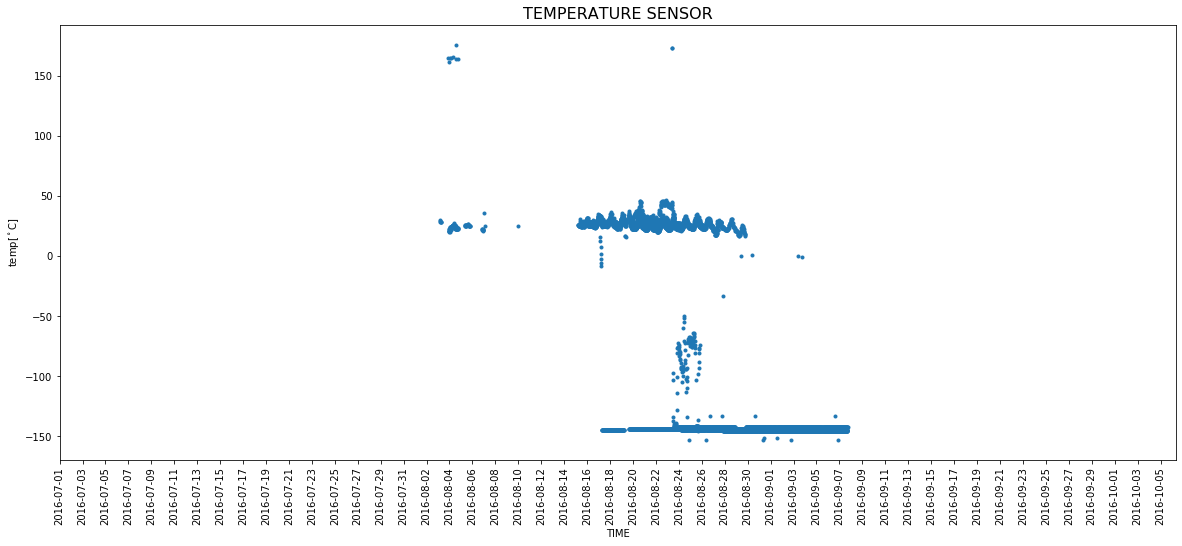

In [22]:
#Subsetting DataFrame to only temperature sensors
sub_df = full[full['type_id']=='TCA']
 
# Plotting
plt.figure(figsize=(20,8))
plt.plot(sub_df.index, sub_df['value'],'.')
plt.xlim(datapoints_copy.index.min(),datapoints_copy.index.max())
plt.title("TEMPERATURE SENSOR",size=16)
plt.ylabel('temp[$^\circ$C]')
plt.xlabel("TIME")
plt.xticks(xticks)
plt.xticks(rotation='vertical');
    

**Task 6.1b:Plot of all temperature sensors as a individual sensor  in one graph**

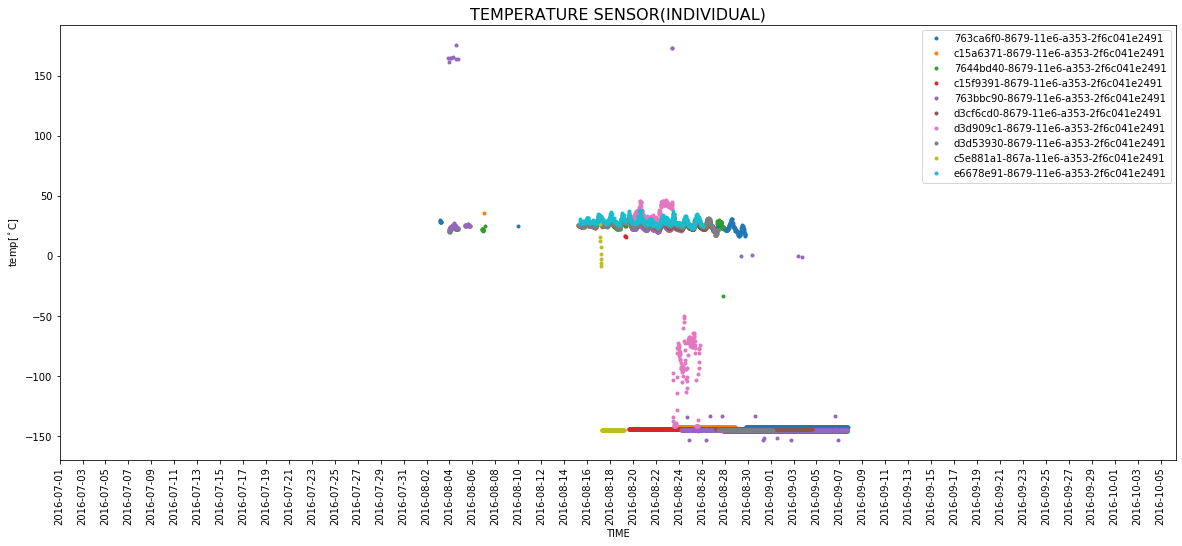

In [23]:
plt.figure(figsize=(20,8))
for s in temp_sensors:
    sub_df = full[full['sensor_id']==s]
    plt.plot(sub_df.index, sub_df['value'],'.',label=s)
    plt.xlim(datapoints_copy.index.min(),datapoints_copy.index.max())
    plt.title("TEMPERATURE SENSOR(INDIVIDUAL)",size=16)
    plt.ylabel('temp[$^\circ$C]')
    plt.xlabel("TIME")
    plt.xticks(xticks)
    plt.legend(ncol=1)
    plt.xticks(rotation='vertical')
    

**Task 6.2: Creating Subplots - Each temperature sensor gets its own panel**

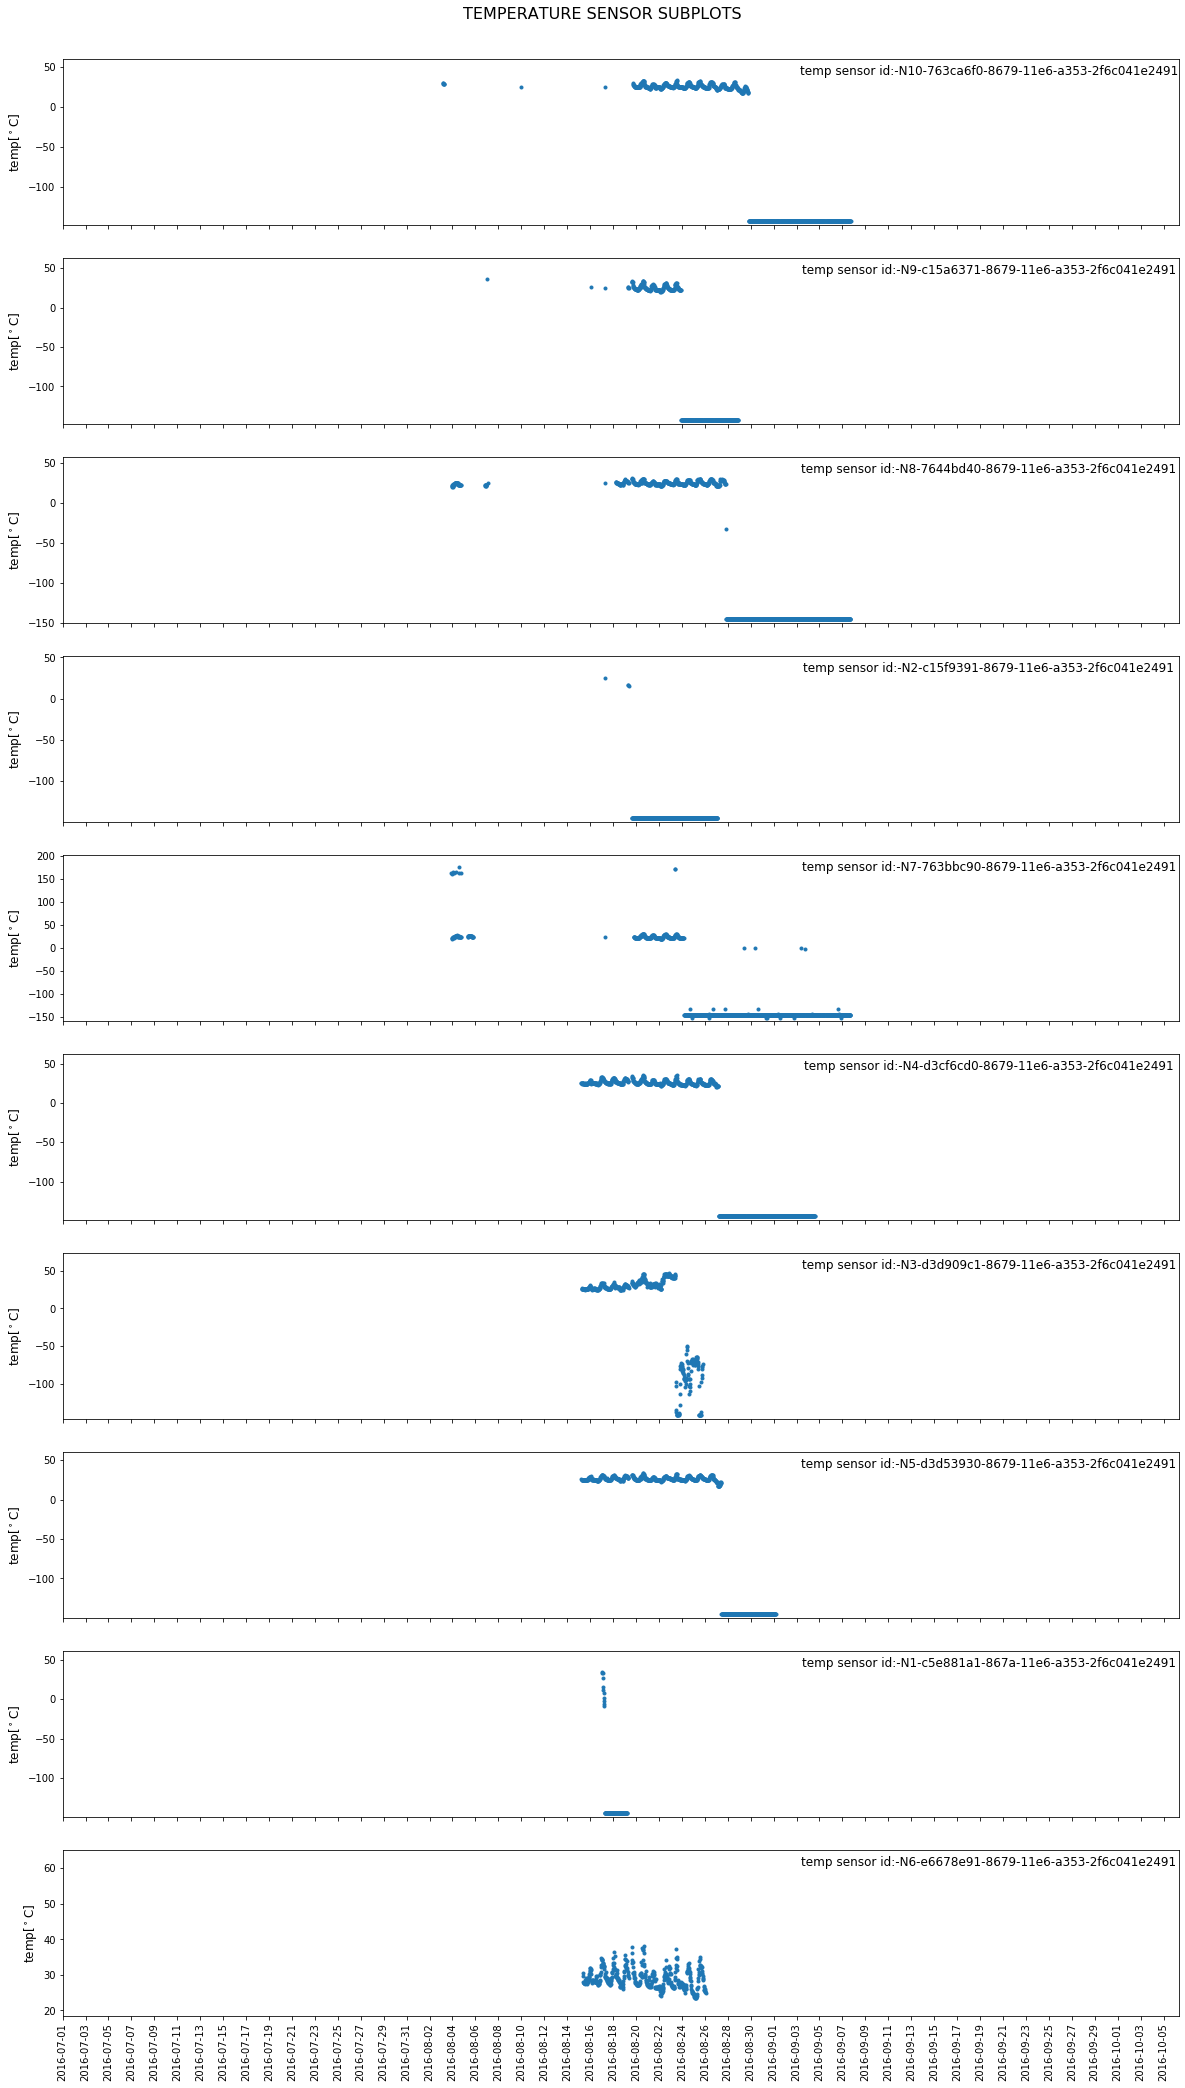

<Figure size 1440x1440 with 0 Axes>

In [24]:
fig, axarr = plt.subplots(10, sharex=True,squeeze=True)
fig.set_size_inches(20,36) 
#plt.xticks(xticks)
plt.xticks(rotation='vertical')


plt.figure(figsize=(20,20))    
for i,s in enumerate(temp_sensors):
    sub_df= full[full['sensor_id']==s]
    n=nodes[nodes.id==sub_df.node_id.values[0]].name.values[0]
    axarr[i].plot(sub_df.index, sub_df['value'],".")
    axarr[i].set_title('temp sensor id:'+"-"+n+"-"+s,position=(0.83,0.87))
    axarr[i].set_ylabel('temp[$^\circ$C]',fontsize=12)
    axarr[i].format_xdata=mdates.DateFormatter('%Y-%m-%d')
    axarr[i].set_xlim(datapoints_copy.index.min(),datapoints_copy.index.max())
    axarr[i].set_xticks(xticks)
    axarr[i].set_ylim(sub_df['value'].min()-5,sub_df['value'].max()+27)

fig.suptitle ('TEMPERATURE SENSOR SUBPLOTS', size=16,y=0.9);

Question: Based on the plots being made, comment on the readings made by the temperature sensors.

<font color='blue'>
<p>1. Typical temperature sensor readings range from `-145 to 46`. However a few exception to the rule as seen in `node-7`
<p>2. Temperature sensor on `node-7` although follows similar pattern as stated in 1 has a few anomally points as spikes</p>
<p>3. All temperature sensors except that at `node-6` maintained a fairly stable value initially then experienced a sudden decline to -ve temperature values</p>
<p>4. The point of the sudden decline noted in 3 seems to follow a lag corresponding to the numerical order of the nodes. There is however exceptions as the sudden drop  in `node-7` and `node-9` happened much earlier than the preceeding nodes
 </p>
</font>

**Task: Clean Up Sensor Data**

In [27]:
#  Task not explicitly stated

## Task: Creating a reshaped Data Frame of Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [28]:
# df.pivot(index='patient', columns='obs', values='score')
temp_df = full[full['sensor_id'].isin(temp_sensors)]
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value').head(2)

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
0,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [29]:
#pd.concat(g for _, g in df.groupby("ID") if len(g) > 1)
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1);

**Task: Drop Duplicates**
1. Drop all the rows where timestamp and sensor_id are duplicated
2. Pivot the table
3. Resample the temperature data to daily level.
4. Calculate the mean of the resampled daily data.

In [30]:
# tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [31]:
#temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
print('rows:',temp_df_cor.shape[0],' columns:',temp_df_cor.shape[1])
temp_df_cor.head(2)

rows: 27477  columns: 10


sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03 04:39:25,NaN,29.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-03 04:47:41,NaN,29.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# daily_temp_cor_df = pivoted.resample('D').mean()
daily_temp_cor_df = temp_df_cor.resample('D').mean()
print('rows:',daily_temp_cor_df.shape[0],' columns:',daily_temp_cor_df.shape[1])
daily_temp_cor_df.head(3)

rows: 65  columns: 10


sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,
2016-08-03,78.082000,28.865,21.067500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-04,48.245556,NaN,23.583611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-05,25.652609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [33]:
# corr_df = daily_temp_cor_df.corr()
corr_df = daily_temp_cor_df.corr()
corr_df

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15a6371-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,c5e881a1-867a-11e6-a353-2f6c041e2491,d3cf6cd0-8679-11e6-a353-2f6c041e2491,d3d53930-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
sensor_id,,,,,,,,,,
763bbc90-8679-11e6-a353-2f6c041e2491,1.000000,0.604068,0.726736,0.994261,0.308354,1.000000,0.732838,0.677272,0.872380,0.652321
763ca6f0-8679-11e6-a353-2f6c041e2491,0.604068,1.000000,0.862264,0.147197,-0.360202,-1.000000,0.773070,0.731762,-0.289171,0.066722
7644bd40-8679-11e6-a353-2f6c041e2491,0.726736,0.862264,1.000000,0.415333,0.119104,-0.295498,0.956649,0.976520,-0.129649,0.323607
c15a6371-8679-11e6-a353-2f6c041e2491,0.994261,0.147197,0.415333,1.000000,0.317385,-1.000000,0.534663,0.507379,0.906632,0.643251
c15f9391-8679-11e6-a353-2f6c041e2491,0.308354,-0.360202,0.119104,0.317385,1.000000,1.000000,0.138210,0.131605,0.289810,0.384183
c5e881a1-867a-11e6-a353-2f6c041e2491,1.000000,-1.000000,-0.295498,-1.000000,1.000000,1.000000,-0.303960,-0.190118,-0.382485,-0.207631
d3cf6cd0-8679-11e6-a353-2f6c041e2491,0.732838,0.773070,0.956649,0.534663,0.138210,-0.303960,1.000000,0.993264,0.502033,0.857822
d3d53930-8679-11e6-a353-2f6c041e2491,0.677272,0.731762,0.976520,0.507379,0.131605,-0.190118,0.993264,1.000000,-0.135213,0.516142
d3d909c1-8679-11e6-a353-2f6c041e2491,0.872380,-0.289171,-0.129649,0.906632,0.289810,-0.382485,0.502033,-0.135213,1.000000,0.468487


In [34]:
# # Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# # top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

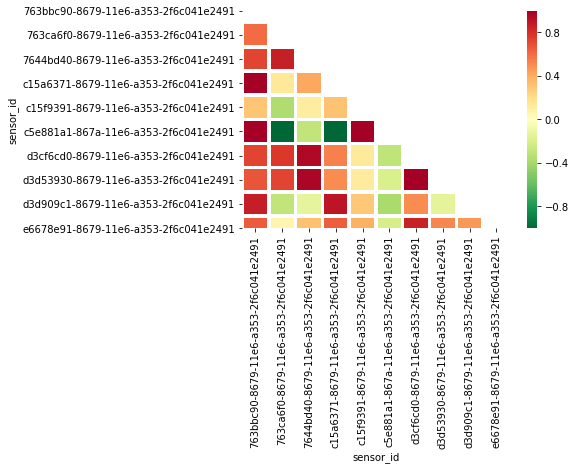

In [35]:
# # Create the heatmap using seaborn library. 
# # List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# # Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [36]:
# full2 = full.reset_index().drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
full_copy=full.copy()
full_copy.reset_index(inplace=True);
full_copy.head(2)

,timestamp,id,value,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
1,2016-08-03 04:47:41,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


In [37]:
# full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')
full2 = full_copy.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
full2.head(2)

,timestamp,id,value,sensor_id,description,data_frequency,status,created_at,updated_at,data_type_id,node_id,type,si_unit,type_id
0,2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT
1,2016-08-03 04:47:41,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,762b8ff0-8679-11e6-a353-2f6c041e2491,battery,percentage,BAT


In [38]:
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')
full_wide.head(2)

sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01 00:00:31,455.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# daily_all_sensors = full_wide.resample('D').mean()
daily_all_sensors = full_wide.resample('D').mean()
print('Daily sensors:- rows:',daily_all_sensors.shape[0],' columns:',daily_all_sensors.shape[1])
daily_all_sensors.head(2)

Daily sensors:- rows: 98  columns: 61


sensor_id,1248ff60-e707-11e6-89c8-314aa4f67f8c,7635c920-8679-11e6-a353-2f6c041e2491,7635f030-8679-11e6-a353-2f6c041e2491,7636da90-8679-11e6-a353-2f6c041e2491,763701a0-8679-11e6-a353-2f6c041e2491,763701a1-8679-11e6-a353-2f6c041e2491,763b9580-8679-11e6-a353-2f6c041e2491,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,763d6a40-8679-11e6-a353-2f6c041e2491,...,d3d909c0-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,d3db2ca0-8679-11e6-a353-2f6c041e2491,d3db53b0-8679-11e6-a353-2f6c041e2491,e66592c0-8679-11e6-a353-2f6c041e2491,e6678e90-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491,e66851e0-8679-11e6-a353-2f6c041e2491,e66851e1-8679-11e6-a353-2f6c041e2491,e6691530-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-07-01,306.902098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-02,267.804196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question:**
Based on the results of the correlation heatmap for temperature sensors, would you recommend working with all temperature sensors or just a subset?

<font color='blue'> 
<p>The correlation values shows a few highly correlated sensors above a correlation coefficient above 0.9. The correlated pair are:</p>
   <p>1.  763bbc90-8679-11e6-a353-2f6c041e2491 and c15a6371-8679-11e6-a353-2f6c041e2491 : 0.994261</p>	
   <p>2.  763bbc90-8679-11e6-a353-2f6c041e2491 and c5e881a1-867a-11e6-a353-2f6c041e2491 : 1.000000</p>
   <p>3.  7644bd40-8679-11e6-a353-2f6c041e2491 and d3cf6cd0-8679-11e6-a353-2f6c041e2491 : 0.956649</p>
   <p>4.  7644bd40-8679-11e6-a353-2f6c041e2491 and d3d53930-8679-11e6-a353-2f6c041e2491 : 0.976520</p>
   <p>5.  d3d53930-8679-11e6-a353-2f6c041e2491 and d3cf6cd0-8679-11e6-a353-2f6c041e2491 : 0.993264</p>
   <p>6.  d3d909c1-8679-11e6-a353-2f6c041e2491 and c15a6371-8679-11e6-a353-2f6c041e2491 : 0.906632</p>

Although they highly  correlated sensors, for this assignment we would not be dropping correlated sensors. The reason as will been seen later is the datapoints after daily sampling are quite few. If sensors are dropped prior to groupping to sensor types and resampling the datapoints, the total datapoints will be reduced as some of these pairs are responsible for having datapoints on some days 

**Task: Based on the answer above, remove unnecessary temperature sensors from the data**

<font color='red'>**NB: Although the choice was made not to drop sensors. Here is the code for dropping correlated senosrs**</font>

In [40]:
# Code for dropping corelated
def drop_correlated(data,threshold):
    
    corr=data.corr().abs()       # correlation
    cols_kept=[]                 # columns to be kept
    
    for i in range(len(corr.iloc[:,0])):
        above=corr.iloc[:i,i]
        if len(cols_kept)>0:
            above=above[cols_kept]
        if len(above[above<threshold])==len(above):
            cols_kept.append(corr.columns.values[i])
    return data[cols_kept]

In [41]:
drop_correlated(daily_temp_cor_df,threshold=0.9).head() #Drops one sensor from pair correlated above 0.9

sensor_id,763bbc90-8679-11e6-a353-2f6c041e2491,763ca6f0-8679-11e6-a353-2f6c041e2491,7644bd40-8679-11e6-a353-2f6c041e2491,c15f9391-8679-11e6-a353-2f6c041e2491,d3d909c1-8679-11e6-a353-2f6c041e2491,e6678e91-8679-11e6-a353-2f6c041e2491
timestamp,,,,,,
2016-08-03,78.082000,28.865,21.067500,NaN,NaN,NaN
2016-08-04,48.245556,NaN,23.583611,NaN,NaN,NaN
2016-08-05,25.652609,NaN,NaN,NaN,NaN,NaN
2016-08-06,NaN,NaN,21.874444,NaN,NaN,NaN
2016-08-07,NaN,NaN,25.280000,NaN,NaN,NaN


## Trying to building a Linear Model

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [42]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

**Task: Merge the full data set with the nodes**

1. Perform the merge above.
2. Resample the data to the daily level and show a sample of the mean.
3. Pivot the table to show columns of the sensor types as columns vs name and timestamp


<img src = "images/example-3.png" width=1000 height=1000>

**TASK1. Perform the merge above.**

In [43]:
fullnode = pd.merge(full.reset_index(), nodes,left_on='node_id', right_on='id')

fullnode.head(2)

,timestamp,id_x,value,sensor_id,description_x,data_frequency,status_x,created_at_x,updated_at_x,data_type_id,...,si_unit,type_id,id_y,name,description_y,location,status_y,created_at_y,updated_at_y,volcano_id
0,2016-08-03 04:39:25,764c5e60-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,...,percentage,BAT,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25,2016-09-29 19:20:17.431,35dc3e90-8679-11e6-bda3-ef77801087ee
1,2016-08-03 04:47:41,765251d0-8679-11e6-a353-2f6c041e2491,98.0,7635c920-8679-11e6-a353-2f6c041e2491,\N,1800000,OFFLINE,2016-08-03 04:39:25,2016-09-29 20:13:52.793,35dcdad2-8679-11e6-bda3-ef77801087ee,...,percentage,BAT,762b8ff0-8679-11e6-a353-2f6c041e2491,N10,\N,\N,OFFLINE,2016-08-03 04:39:25,2016-09-29 19:20:17.431,35dc3e90-8679-11e6-bda3-ef77801087ee


**TASK2. Resample the data to the daily level and show a sample of the mean.**

In [44]:
fullnode.set_index('timestamp', inplace=True)

In [45]:
fullnode.resample('D').mean().head(2)

,value,data_frequency
timestamp,,
2016-07-01,306.902098,1800000.0
2016-07-02,267.804196,1800000.0


**TASK3. Pivot the table to show columns of the sensor types as columns vs name and timestamp**

In [46]:
fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')

In [47]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [48]:
fn_wide.head()

type,name,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
timestamp,,,,,,,,
2016-07-01 00:00:31,RSAM,455.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:10:02,RSAM,213.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:20:00,RSAM,225.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:30:01,RSAM,321.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01 00:40:00,RSAM,429.0,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
fn_wide.shape

(36329, 8)

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [50]:
lmfn = fn_wide.resample('D').mean()

In [51]:
lmfn.shape

(98, 7)

In [52]:
# Describe data to see statistics
lmfn.describe()

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
count,62.000000,42.000000,29.000000,30.000000,30.000000,3.000000e+01,30.000000
mean,261.939330,75.430055,346.823410,58.820877,29.616125,1.255737e+06,-48.848781
std,100.862440,20.952203,245.431962,19.626852,148.254949,1.563750e+06,74.441163
min,86.496503,38.742520,1.165304,28.960396,0.189331,9.199418e+04,-144.177671
25%,183.818182,55.750785,150.738548,39.876103,0.336605,9.759493e+04,-143.175446
50%,264.232485,78.115251,335.450750,61.747112,0.931684,1.064047e+05,-20.736104
75%,337.113636,96.024306,516.037000,76.540694,2.235000,2.481076e+06,18.640262
max,494.041958,97.419608,935.874162,87.126642,813.951000,5.164205e+06,43.191333


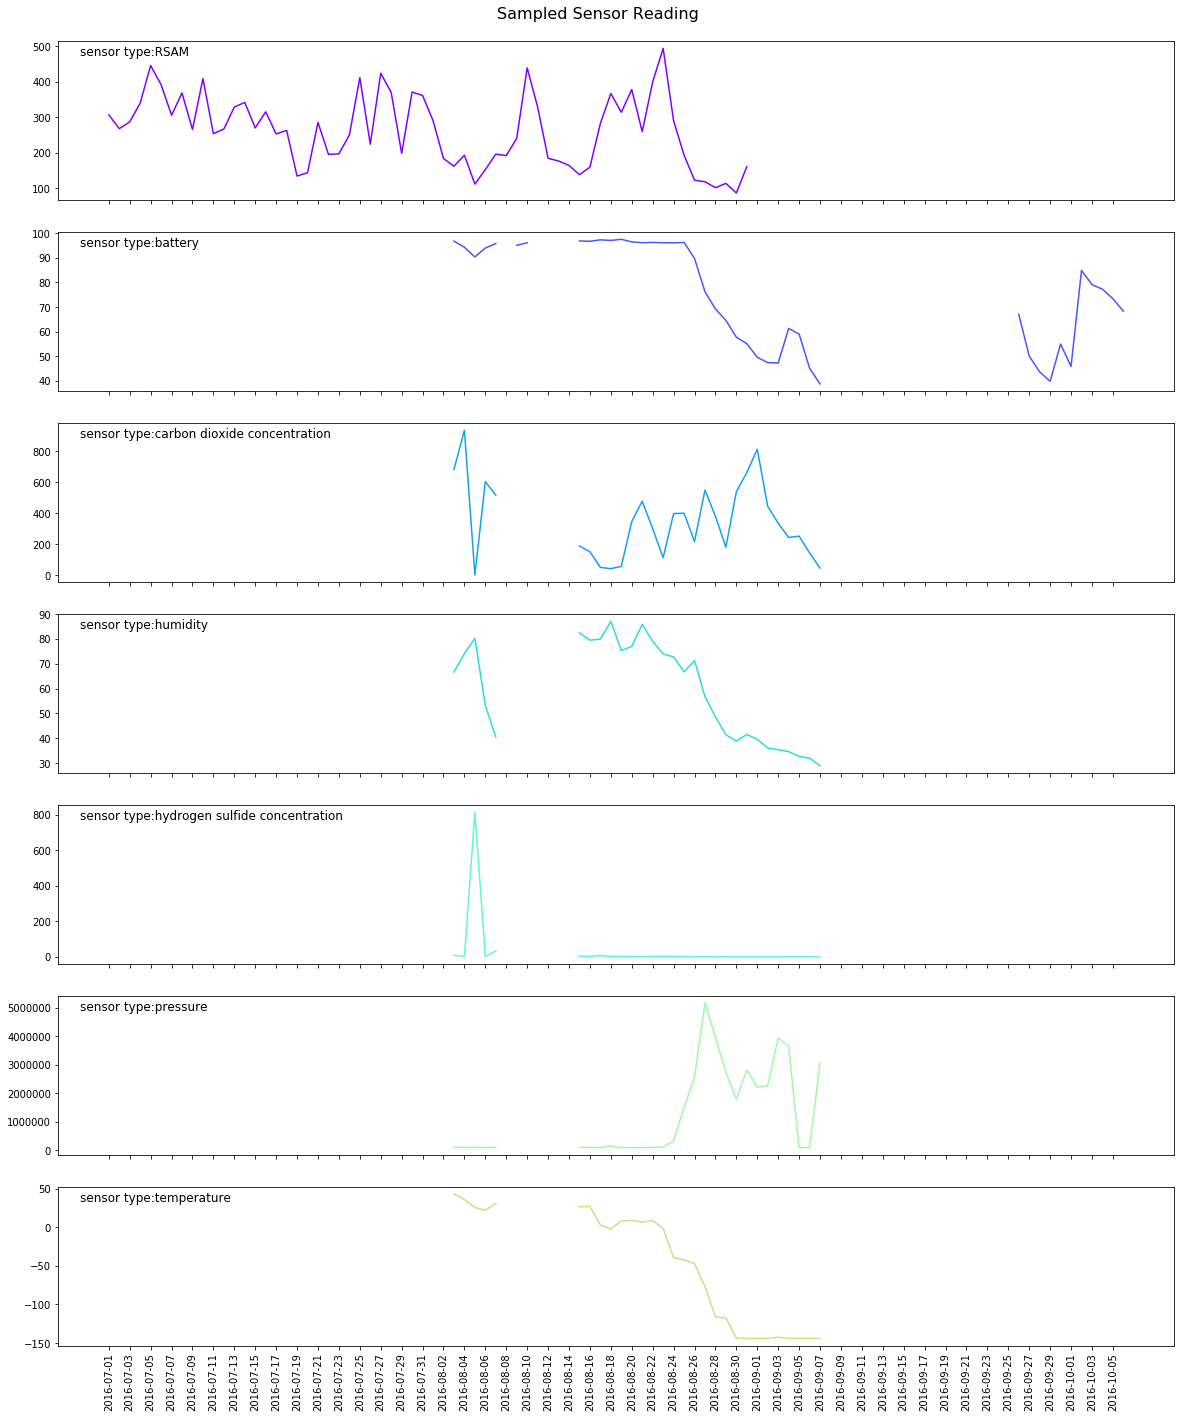

In [68]:
# Plot Data to see the behaviour of sampled sensor data

fig, axarr = plt.subplots(7, sharex=True,squeeze=True)
fig.set_size_inches(20,24) 
plt.xticks(rotation='vertical')
colors = [cm.rainbow(i) for i in np.linspace(0, 1, len(temp_sensors))]
   
for i,s in enumerate(list(lmfn.columns)):
    sub_df= lmfn[s]
    axarr[i].plot(sub_df.index, sub_df,color=colors[i],label=s)
    axarr[i].set_title('sensor type:'+s,loc='left',position=(0.02,0.87)) 
    axarr[i].set_xticks(pd.date_range(sub_df.index.min(),sub_df.index.max(),freq='2D'))


fig.suptitle ('Sampled Sensor Reading', size=16,y=0.9);

In [54]:
lmfn.isnull().sum()

type
RSAM                              36
battery                           56
carbon dioxide concentration      69
humidity                          68
hydrogen sulfide concentration    68
pressure                          68
temperature                       68
dtype: int64

<font color='red'>**OBSERVATION:**
1. Total number of days is 98, high percentages of these days are missing values
2. Traditional methods of filling in missing values will prove abbortive as the space between missing values is much
3. Deleting the rows with missing values will drastically reduce the number of datapoints</font>

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* <font color='red'>What is the `RMSE` of your predicted values?</font>

**Question: Which variable (sensor) is a good predictor of battery life?**
<font color='blue'>
    <p>
        Hypothesis based on the resampled daily plot in `7.0`. `Humidity` and `Temperature` seems to follow the shape of Battery life. This hypothesis will be tested in the steps below
    </p>
</font>

**8.1: Perform Data Correlation**

In [55]:
corr_lmfn = lmfn.corr()
corr_lmfn.head(7)

type,RSAM,battery,carbon dioxide concentration,humidity,hydrogen sulfide concentration,pressure,temperature
type,,,,,,,
RSAM,1.000000,0.526771,-0.317764,0.506201,-0.209642,-0.516079,0.382231
battery,0.526771,1.000000,-0.075724,0.864687,0.108841,-0.626338,0.939950
carbon dioxide concentration,-0.317764,-0.075724,1.000000,-0.202990,-0.267248,0.141891,-0.044357
humidity,0.506201,0.864687,-0.202990,1.000000,0.205582,-0.543322,0.812239
hydrogen sulfide concentration,-0.209642,0.108841,-0.267248,0.205582,1.000000,-0.150822,0.204063
pressure,-0.516079,-0.626338,0.141891,-0.543322,-0.150822,1.000000,-0.701591
temperature,0.382231,0.939950,-0.044357,0.812239,0.204063,-0.701591,1.000000


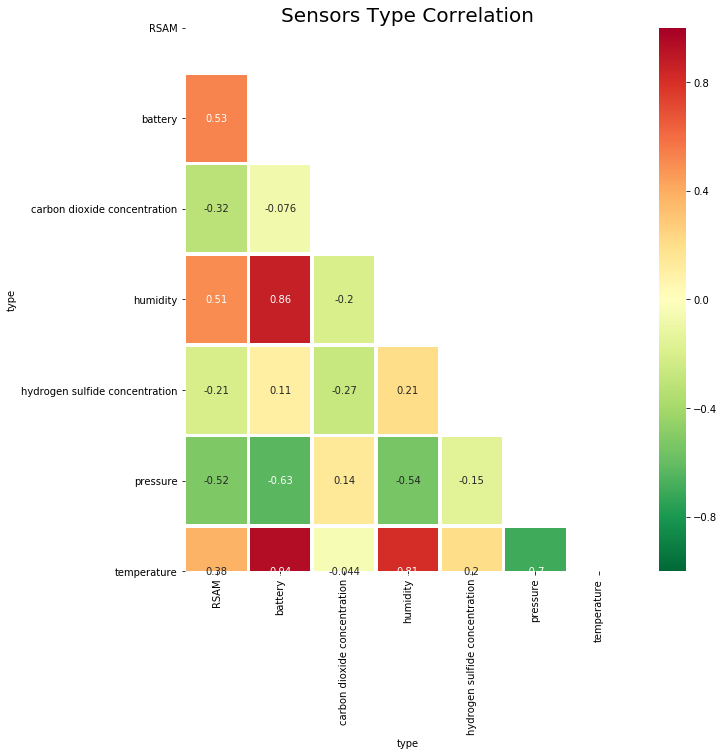

In [56]:
# compute correlation to confirm choice of x variable(s)
mask = np.zeros_like(corr_lmfn)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap using seaborn library. 
plt.figure(figsize=(10,10))
sns.heatmap(corr_lmfn, annot=True, cmap='RdYlGn_r',mask=mask, vmax=1.0, vmin=-1.0, linewidths=2.5)

# set figure title
plt.title ('Sensors Type Correlation', size=20)

# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90);

<font color='red'> **OBSERVATION:** <p>Performing the correlation confirms initial hypothesis. A correlation coefficeient of 0.939950 and 0.864687	for temperature and humidity respectively. Gives an indication of possible relationship between battery life,temperature and humidity. Further analysis will be carried out to confirm this hypothesis</p></font>
   

### 8.2: Build Supervised Learning Model

**<font color='red'>
NB: Considering the nature of the data which is widely spaced. I opted to delete the missing values
    <p>1. I opted to use `two` different algorithm ie `Decision Tree` and `LR` so as to have a basis for comparing the LR algorithm</p><p>2. I opted to use two different split methods sequential(which splits in order of the dates) and random which takes the splits randomly</p><p>3. I opted to use several metrics in analysing the models they're: the `RMSE`, `Goodness of fit[R^2]` and `visual plot` of predicted vs actual</p>
</font>**


In [57]:
# #==============================================================================
# # Supervised learning linear regression
# #==============================================================================

## Import libraries for Linear regression and Decision Tree
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [58]:
# # Split the data into training/testing sets

# Drop missing values
lmfn1=lmfn.dropna()
print('No of datapoints:',lmfn1.shape[0])

# Split Data to test and train sequentially
train = lmfn1[7:]
test = lmfn1[:7]

# Split Data to test and train set randomly
train2, test2= train_test_split(lmfn1, test_size=0.30, random_state=0)

No of datapoints: 22


In [59]:
# Separate Target and Features
cols=list(lmfn.columns) #Get column names to list

## Set Target variable
cols_target=cols[1]
print('Target:\n',cols_target,'\n')
cols_predictor=cols.copy()
del cols_predictor[1]
print('Predictor:\n',cols_predictor)

Target:
 battery 

Predictor:
 ['RSAM', 'carbon dioxide concentration', 'humidity', 'hydrogen sulfide concentration', 'pressure', 'temperature']


**8.2.1a: Linear Regression Model Using all Features(Sequential Split)**

RMSE_Train:	 3.8630857969575834 
RMSE_Test:	 52.684397593126505


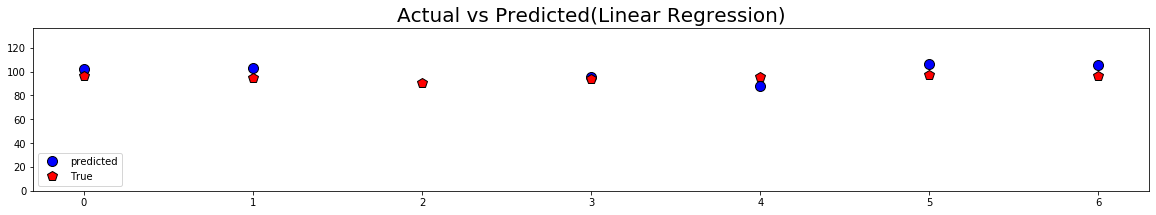

In [60]:
# Here all the target variable are used in prediction
target, predictors = cols_target,cols_predictor
x_train=train[predictors] #converts the pandas Series to numpy.ndarray
y_train=train[target]
x_test=test[predictors] #converts the pandas Series to numpy.ndarray
y_test=test[target]

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train.values,y_train.values)


print('RMSE_Train:\t',(np.mean((regr.predict(x_train) - y_train) ** 2))**0.5,
      '\nRMSE_Test:\t',(np.mean((regr.predict(x_test) - y_test) ** 2))**0.5)

plt.figure(figsize=(20,3))
plt.plot(regr.predict(x_test),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
plt.plot(y_test.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
plt.legend(loc='lower left')
plt.ylim(0,y_test.values.max()+40)
plt.title('Actual vs Predicted(Linear Regression)', size=20,y=1);

**8.2.1b: Linear Regression Model Using individual Features(Sequential Split)**

,Predictor,Coef,RMSE_Train,RMSE_Test,Good_fit
0,RSAM,0.091866,10.484661,17.597809,-64.250791
1,carbon dioxide concentration,-0.046023,12.711141,21.379504,-95.308324
2,humidity,0.918176,4.742808,15.943772,-52.561250
3,hydrogen sulfide concentration,5.504703,12.829220,1689.601034,-601500.757680
4,pressure,-0.000007,10.923755,2.204792,-0.024245
5,temperature,0.262708,4.245570,10.832119,-23.722671


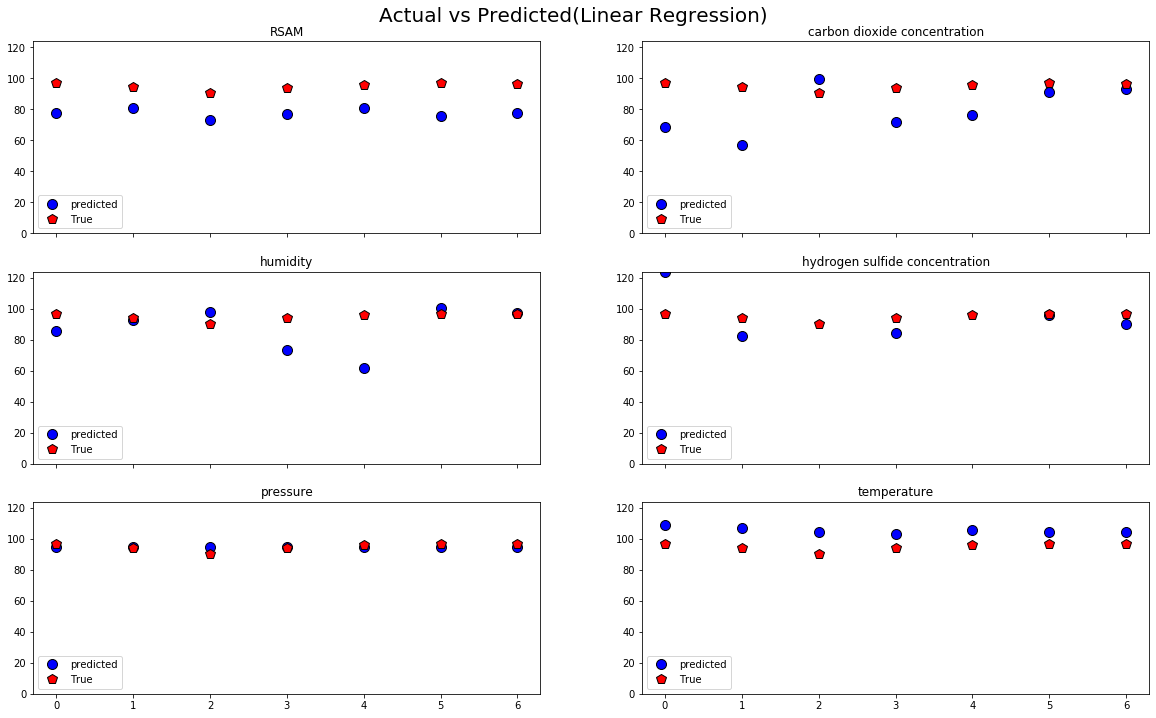

In [61]:
# Here the individual targets are used to predict battery life via a loop
target, predictors = cols_target,cols_predictor
fig, axarr = plt.subplots(3,2, sharex=True,squeeze=True)
axarr=axarr.flatten()
fig.set_size_inches(20,12) 
dict={'Predictor':[],'Coef':[],'RMSE_Train':[],'RMSE_Test':[],'Good_fit':[]}

for i,predictor in enumerate(predictors):
    x_train=train[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_train=train[target].to_frame()
    x_test=test[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_test=test[target].to_frame()
    
    # 2.- Create linear regression object
    regr = linear_model.LinearRegression()

    # 3.- Train the model using the training sets
    regr.fit(x_train.values,y_train.values)

    dict['Predictor'].append(predictor)
    dict['Coef'].append(float(regr.coef_))
    dict['RMSE_Train'].append((np.mean((regr.predict(x_train) - y_train) ** 2).values[0])**0.5)
    dict['RMSE_Test'].append((np.mean((regr.predict(x_test) - y_test) ** 2).values[0])**0.5)
    dict['Good_fit'].append(r2_score(y_test, regr.predict(x_test))) #goodness of fit
    
    axarr[i].plot(regr.predict(x_test),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
    axarr[i].plot(y_test.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
    axarr[i].set_title(predictor,loc='center') 
    axarr[i].set_ylim(0,y_test.values.max()+27)
    axarr[i].legend(loc='lower left');


fig.suptitle ('Actual vs Predicted(Linear Regression)', size=20,y=0.92);
pd.DataFrame.from_dict(dict)

**8.2.1c: Decision Tree Model Using all Features(Sequential Split)**

RMSE_Train:	 0.0 
RMSE_Test:	 12.374545224824384


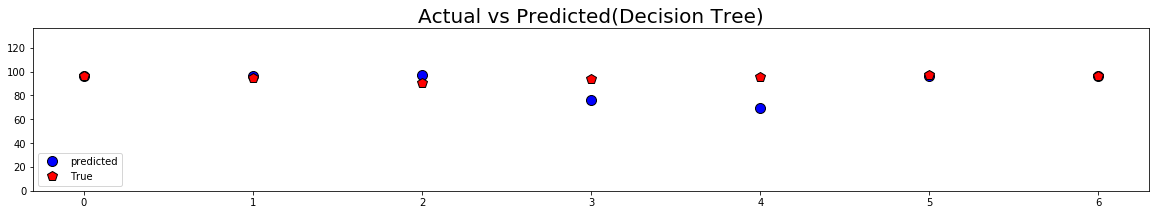

In [62]:
target, predictors = cols_target,cols_predictor
x_train=train[predictors] #converts the pandas Series to numpy.ndarray
y_train=train[target]
x_test=test[predictors] #converts the pandas Series to numpy.ndarray
y_test=test[target]
    
# 2.- Create linear regression object
regr = DecisionTreeRegressor(random_state=0)

# 3.- Train the model using the training sets
regr.fit(x_train.values,y_train.values)


print('RMSE_Train:\t',(np.mean((regr.predict(x_train) - y_train) ** 2))**0.5,
      '\nRMSE_Test:\t',(np.mean((regr.predict(x_test) - y_test) ** 2))**0.5)


plt.figure(figsize=(20,3))
plt.plot(regr.predict(x_test),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
plt.plot(y_test.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
plt.legend(loc='lower left')
plt.ylim(0,y_test.values.max()+40)
plt.title('Actual vs Predicted(Decision Tree)', size=20,y=1);

**8.2.1d: Decision Tree Model Using Individual Features(Sequential Split)**

,Predictor,RMSE_Train,RMSE_Test,Good_fit
0,RSAM,0.0,28.462479,-169.692332
1,carbon dioxide concentration,0.0,31.905585,-213.487499
2,humidity,0.0,13.824171,-39.266769
3,hydrogen sulfide concentration,0.0,2.964072,-0.851169
4,pressure,0.0,2.526234,-0.344670
5,temperature,0.0,2.646675,-0.475943


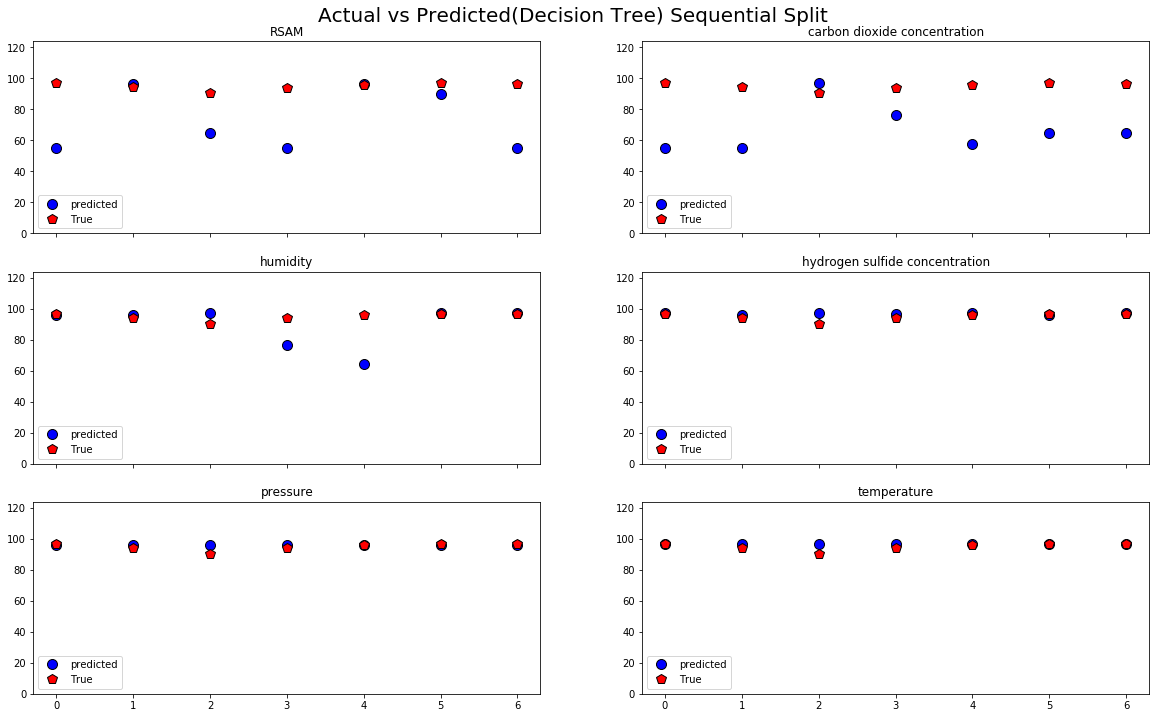

In [63]:
target, predictors = cols_target,cols_predictor
fig, axarr = plt.subplots(3,2, sharex=True,squeeze=True)
axarr=axarr.flatten()
fig.set_size_inches(20,12) 
dict={'Predictor':[],'RMSE_Train':[],'RMSE_Test':[] ,'Good_fit':[]}

for i,predictor in enumerate(predictors):

    x_train=train[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_train=train[target].to_frame()
    x_test=test[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_test=test[target].to_frame()
    
    # 2.- Create Tree regression object
    regr = DecisionTreeRegressor(random_state=0)

    # 3.- Train the model using the training sets
    regr.fit(x_train.values,y_train.values)
    #print(regr.predict(x_train)-list(y_train))
    dict['Predictor'].append(predictor)
    dict['RMSE_Train'].append((np.mean((regr.predict(x_train)-y_train.values.reshape(1,15)) ** 2))**0.5)
    dict['RMSE_Test'].append((np.mean((regr.predict(x_test) - y_test.values.reshape(1,7)) ** 2))**0.5)
    dict['Good_fit'].append(r2_score(y_test, regr.predict(x_test))) #goodness of fit

    axarr[i].plot(regr.predict(x_test),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
    axarr[i].plot(y_test.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
    axarr[i].set_title(predictor,loc='center') 
    axarr[i].set_ylim(0,y_test.values.max()+27)
    axarr[i].legend(loc='lower left');


fig.suptitle ('Actual vs Predicted(Decision Tree) Sequential Split', size=20,y=0.92);
pd.DataFrame.from_dict(dict)

**8.2.2a: Decision Tree Model Using Individual Features(Random Split)**

RMSE_Train:	 3.381378220872684 
RMSE_Test:	 7.382994078654559


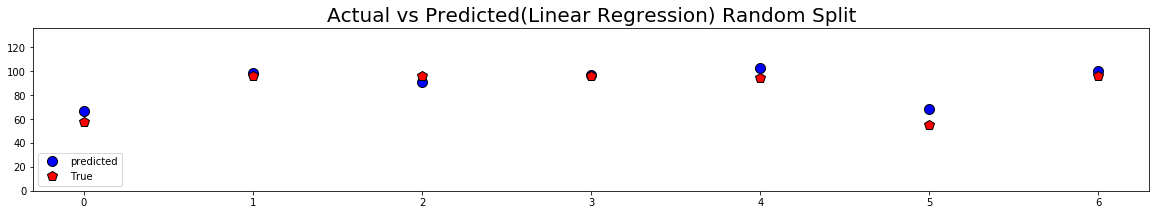

In [64]:
target, predictors = cols_target,cols_predictor
x_train2=train2[predictors] #converts the pandas Series to numpy.ndarray
y_train2=train2[target]
x_test2=test2[predictors] #converts the pandas Series to numpy.ndarray
y_test2=test2[target]

# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(x_train2.values,y_train2.values)


print('RMSE_Train:\t',(np.mean((regr.predict(x_train2) - y_train2) ** 2))**0.5,
      '\nRMSE_Test:\t',(np.mean((regr.predict(x_test2) - y_test2) ** 2))**0.5)

plt.figure(figsize=(20,3))
plt.plot(regr.predict(x_test2),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
plt.plot(y_test2.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
plt.legend(loc='lower left')
plt.ylim(0,y_test2.values.max()+40)
plt.title('Actual vs Predicted(Linear Regression) Random Split', size=20,y=1);

**8.2.2b: Linear Regression Model Using individual Features(Random Split)**

,Predictor,Coef,RMSE_Train,RMSE_Test,Good_fit
0,RSAM,0.060005,8.955267,16.721895,0.116588
1,carbon dioxide concentration,-0.005269,10.539542,18.043242,-0.028541
2,humidity,0.454346,8.140599,11.735645,0.564883
3,hydrogen sulfide concentration,0.000620,10.599716,18.680794,-0.102511
4,pressure,-0.000005,5.993538,14.740059,0.313579
5,temperature,0.183352,4.800985,7.156783,0.838182


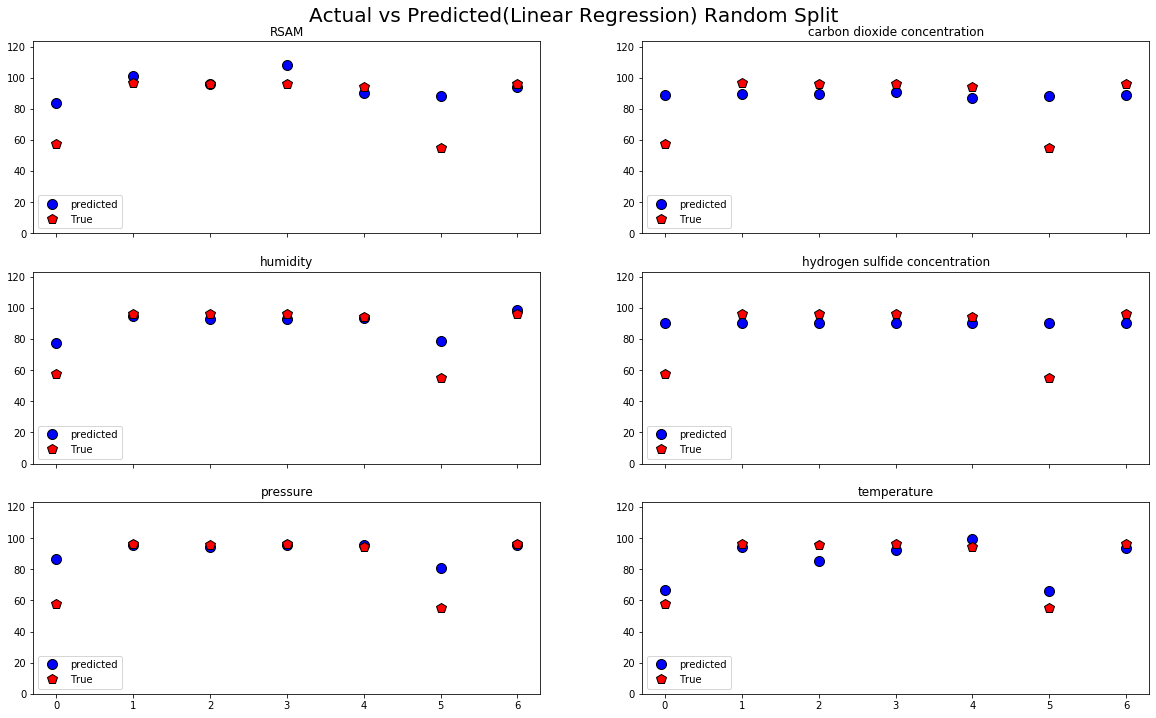

In [65]:
target, predictors = cols_target,cols_predictor
fig, axarr = plt.subplots(3,2, sharex=True,squeeze=True)
axarr=axarr.flatten()
fig.set_size_inches(20,12) 
dict={'Predictor':[],'Coef':[],'RMSE_Train':[],'RMSE_Test':[],'Good_fit':[]}

for i,predictor in enumerate(predictors):
    x_train2=train2[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_train2=train2[target].to_frame()
    x_test2=test2[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_test2=test2[target].to_frame()
    
    # 2.- Create linear regression object
    regr = linear_model.LinearRegression()

    # 3.- Train the model using the training sets
    regr.fit(x_train2.values,y_train2.values)

    dict['Predictor'].append(predictor)
    dict['Coef'].append(float(regr.coef_))
    dict['RMSE_Train'].append((np.mean((regr.predict(x_train2) - y_train2) ** 2).values[0])**0.5)
    dict['RMSE_Test'].append((np.mean((regr.predict(x_test2) - y_test2) ** 2).values[0])**0.5)
    dict['Good_fit'].append(r2_score(y_test2, regr.predict(x_test2))) #goodness of fit

    axarr[i].plot(regr.predict(x_test2),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
    axarr[i].plot(y_test2.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
    axarr[i].set_title(predictor,loc='center') 
    axarr[i].set_ylim(0,y_test2.values.max()+27)
    axarr[i].legend(loc='lower left');


fig.suptitle ('Actual vs Predicted(Linear Regression) Random Split', size=20,y=0.92);
pd.DataFrame.from_dict(dict)

**8.2.2c: Decision Tree Model Using all Features(Random Split)****

RMSE_Train:	 0.0 
RMSE_Test:	 5.810328616555108


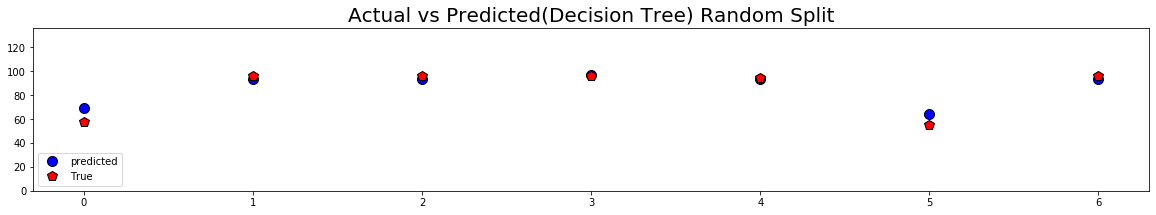

In [66]:
target, predictors = cols_target,cols_predictor
x_train2=train2[predictors] #converts the pandas Series to numpy.ndarray
y_train2=train2[target]
x_test2=test2[predictors] #converts the pandas Series to numpy.ndarray
y_test2=test2[target]
    
# 2.- Create decsion tree regression object
regr = DecisionTreeRegressor(random_state=0)

# 3.- Train the model using the training sets
regr.fit(x_train2.values,y_train2.values)


print('RMSE_Train:\t',(np.mean((regr.predict(x_train2) - y_train2) ** 2))**0.5,
      '\nRMSE_Test:\t',(np.mean((regr.predict(x_test2) - y_test2) ** 2))**0.5)


plt.figure(figsize=(20,3))
plt.plot(regr.predict(x_test2),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
plt.plot(y_test2.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
plt.legend(loc='lower left')
plt.ylim(0,y_test2.values.max()+40)
plt.title('Actual vs Predicted(Decision Tree) Random Split', size=20,y=1);

**8.2.2d: Decision Tree Model Using individual Features(Random Split)**

,Predictor,RMSE_Train,RMSE_Test,Good_fit
0,RSAM,0.0,16.327588,0.157759
1,carbon dioxide concentration,0.0,20.055671,-0.270769
2,humidity,0.0,15.063314,0.283142
3,hydrogen sulfide concentration,0.0,7.373537,0.828231
4,pressure,0.0,15.210463,0.269068
5,temperature,0.0,4.494190,0.936189


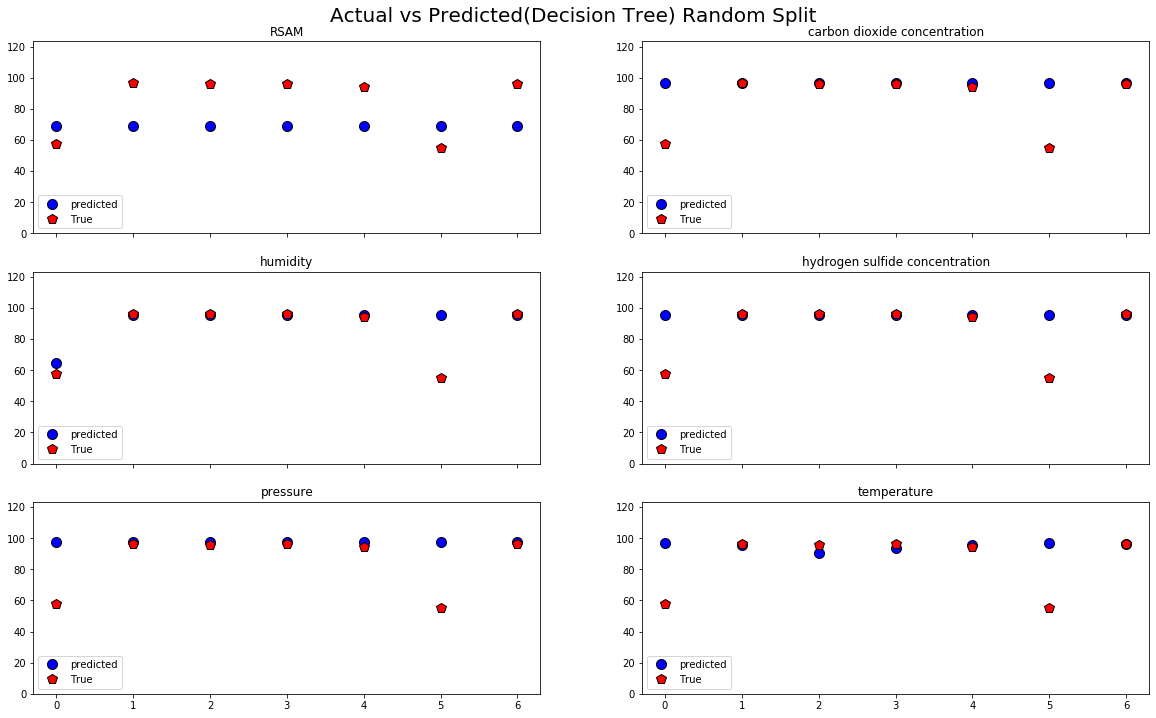

In [67]:
target, predictors = cols_target,cols_predictor
fig, axarr = plt.subplots(3,2, sharex=True,squeeze=True)
axarr=axarr.flatten()
fig.set_size_inches(20,12) 
dict={'Predictor':[],'RMSE_Train':[],'RMSE_Test':[],'Good_fit':[]}

for i,predictor in enumerate(predictors):

    x_train2=train2[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_train2=train2[target].to_frame()
    x_test2=test2[predictor].to_frame() #converts the pandas Series to numpy.ndarray
    y_test2=test2[target].to_frame()
    
    # 2.- Create Tree regression object
    regr = DecisionTreeRegressor(random_state=0)

    # 3.- Train the model using the training sets
    regr.fit(x_train2.values,y_train2.values)
    #print(regr.predict(x_train)-list(y_train))
    dict['Predictor'].append(predictor)
    dict['RMSE_Train'].append((np.mean((regr.predict(x_train2)-y_train2.values.reshape(1,15)) ** 2))**0.5)
    dict['RMSE_Test'].append((np.mean((regr.predict(x_test2) - y_test2.values.reshape(1,7)) ** 2))**0.5)
    dict['Good_fit'].append(r2_score(y_test2, regr.predict(x_test2))) #goodness of fit

    axarr[i].plot(regr.predict(x_test),marker='o', markersize=10,linestyle="none",markerfacecolor = 'blue', 
         markeredgecolor='black',label="predicted")
    axarr[i].plot(y_test2.values,marker='p', markersize=10,linestyle="none",markerfacecolor = 'red' , 
         markeredgecolor='black',label="True")
    axarr[i].set_title(predictor,loc='center') 
    axarr[i].set_ylim(0,y_test2.values.max()+27)
    axarr[i].legend(loc='lower left');


fig.suptitle ('Actual vs Predicted(Decision Tree) Random Split', size=20,y=0.92);
pd.DataFrame.from_dict(dict)

**Is your linear regression a "good fit?"**

<font color='blue'> 
   <p> 1. The analysis shows that using individual variables to predict battery is more accurate than using all variables</p><p>2. `Temperature`variable seems to be the best fit for predicting `Battery life` as seen from the RMSE for both Train and Test</p><p>3. Although the results obtained from LR with a goodness of fit of 83.4% are quite encouraging it is difficult to ascertain if LR is a good fit:
        <p> a. The data available is too few to support any position</p>
        <p> b. Although the RMSE is <10 without an understanding of the system it is impossible to asertain if the RMSE is significant</p>
   </p>
</font>
<font color='red'>
    To take any posture on wether LR model is a good fit for this prediction more dataset should be used in building the model
</font>

**What is the RMSE of your predicted values?**

As calculated above the best LR model(temperature) random spliting, has a RMSE for both train and test as `4.80098`, `7.156783` respectively.